# ---------------------Pandas Assignment--------------------------------

####      

# Assignment  Part 01
### ----------------------------------------

In [1]:
import numpy as np
import pandas as pd

## 1. Creating us_census using glob

In [2]:
import glob

In [3]:
# Importing all files 
states_df =[]
for name in glob.glob("/home/muhammad-atique/Documents/Q2_PIAIC/pandas/assignment/Assignment/states[0-9].csv"):
     states_df.append(pd.DataFrame(pd.read_csv(name, index_col=0)))

In [4]:
us_census = pd.concat(states_df,ignore_index=  True)

## 2. us_census.head()

In [5]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


## 3. Colums in Data and Data  types

In [6]:
# printing coluns names
print(us_census.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [7]:
#printing dtypes
print(us_census.dtypes)

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


## 4,5. Removing doller Sign from Income using regex

In [8]:
incomes = us_census.Income
filtered_incom_value=[]
import re
for incom in incomes:
    num_income = re.split("\$",incom)
    filtered_incom_value.append(num_income[1])
    
filtered_incomes = pd.Series(filtered_incom_value,index=incomes.index)
us_census.Income=filtered_incomes


## 6. GenderPop spliting to Mens And Womens 

In [9]:
us_census[['Mens','Women']] =us_census.GenderPop.str.split('_',expand =True)

In [10]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Mens,Women
0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.91780821918,1459229M_1444150F,1459229M,1444150F
1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.96721311475,308573M_318031F,308573M,318031F
2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.01341201717,4060948M_4195682F,4060948M,4195682F
3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.76768377254,3487725M_3497739F,3487725M,3497739F
4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,41437.11157024794,913631M_937789F,913631M,937789F


## Removing Characters 

In [11]:
us_census=us_census.replace({'M':'',"F":'','%':''},regex =True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Mens,Women
0,Utah,2903379,13.468376068376063,79.40683760683764,1.0179487179487194,1.0813675213675222,2.196068376068376,0.8259829059829059,63488.91780821918,1459229_1444150,1459229,1444150
1,Vermont,626604,1.6092896174863391,93.98306010928961,0.9808743169398909,0.301639344262295,1.2387978142076501,0.03060109289617486,55602.96721311475,308573_318031,308573,318031
2,Virginia,8256630,8.0110164981373,63.271048430015945,20.17599787120807,0.21245343267695582,5.455242150079845,0.06471527408195847,72866.01341201717,4060948_4195682,4060948,4195682
3,Washington,6985464,11.140968858131506,72.03840830449816,3.384429065743947,1.4107266435986163,7.022006920415224,0.609896193771627,64493.76768377254,3487725_3497739,3487725,3497739
4,West Virginia,1851420,1.290909090909089,92.17623966942146,3.6628099173553723,0.15268595041322316,0.6824380165289253,0.02644628099173554,41437.11157024794,913631_937789,913631,937789


## Cleanind data by droping GenderPop column

In [12]:
us_census = us_census.drop(columns='GenderPop')

 ## Converting Data to numeric values

In [13]:
us_census.loc[:,"Hispanic":] = us_census.loc[:,"Hispanic":].apply(pd.to_numeric)
us_census.loc[:,"Hispanic":] = round(us_census.loc[:,"Hispanic":],2)
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Mens          int64
Women       float64
dtype: object

In [14]:
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Mens,Women
0,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229,1444150.0
1,Vermont,626604,1.61,93.98,0.98,0.30,1.24,0.03,55602.97,308573,318031.0
2,Virginia,8256630,8.01,63.27,20.18,0.21,5.46,0.06,72866.01,4060948,4195682.0


## Checking for Nan

In [15]:
np.where(pd.isnull(us_census))

(array([ 6, 16, 23, 25, 30, 32, 37, 41]),
 array([10,  7,  7, 10,  7,  7,  7, 10]))

In [16]:
us_census.iloc[[6,16,23,25,30,37,41]]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Mens,Women
6,aryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78765.40,2872643,NaN
16,North Dakota,721640,2.83,87.45,1.28,5.65,0.96,NaN,58188.11,367963,353677.0
23,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239.0
25,ontana,1014699,3.27,86.42,0.43,7.06,0.57,0.07,47645.68,510163,NaN
30,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239.0
37,Kansas,2892987,11.64,75.96,6.57,0.73,2.33,NaN,53885.61,1439862,1453125.0
41,aryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78765.40,2872643,NaN


## Filling Nan in women Column

In [17]:
us_census['Women'] = us_census['TotalPop']- us_census['Mens']

## Removing Duplicates

In [18]:
 duplicate = us_census.duplicated()
us_census[duplicate]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Mens,Women
24,issouri,6045448,4.04,77.51,14.12,0.36,1.62,0.10,49763.99,2964003,3081445
29,New Jersey,8904413,18.75,56.49,14.39,0.12,8.16,0.03,76581.08,4343027,4561386
30,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
41,aryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78765.40,2872643,3057895
42,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.05,50811.08,4883331,5123362
47,Iowa,3093526,5.30,87.72,3.26,0.29,1.70,0.06,53017.75,1534595,1558931
48,Ohio,11575977,3.67,75.90,16.21,0.17,1.62,0.02,49655.25,5662893,5913084
54,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388,543273
59,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229,1444150


In [19]:
us_census = us_census.drop_duplicates()

## Ploting Scatter plot Graph

Text(0.5, 0, ' Womens')

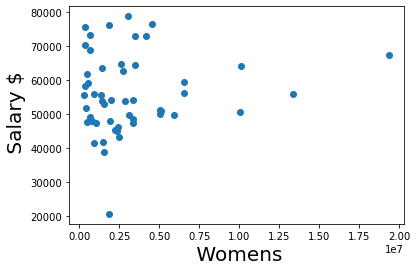

In [20]:
import matplotlib.pyplot as pt
pt.scatter(us_census['Women'],us_census['Income'])
pt.ylabel(' Salary $',fontsize=20)
pt.xlabel(' Womens',fontsize=20)

## Converting races percentage to Numerical

In [21]:
us_census =us_census.loc[:, 'Hispanic':'Pacific'].apply(lambda x:x*us_census['TotalPop']/100)

## Slicing Races for histarogram

In [22]:
races = us_census.loc[:, 'Hispanic':'Pacific']

## Cleaning Data & Filling Nan

In [23]:
races.duplicated().any()

False

In [24]:
pd.isnull(races).any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [25]:
races.fillna(method ="ffill",inplace = True)

In [26]:
races = races.astype(int)
races.head(2)

,Hispanic,White,Black,Native,Asian,Pacific
0,391085,2305573,29614,31356,63874,24098
1,10088,588882,6140,1879,7769,187


In [27]:
## Ploting histarograms

array([[<AxesSubplot:title={'center':'Pacific'}>]], dtype=object)

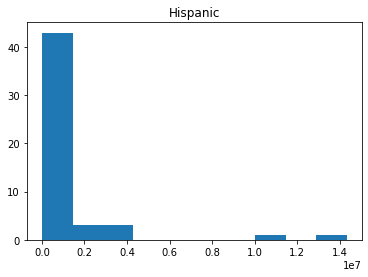

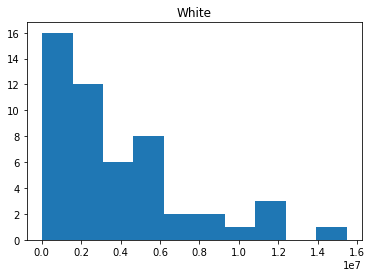

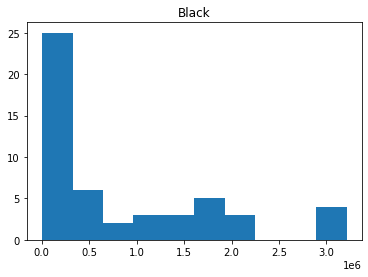

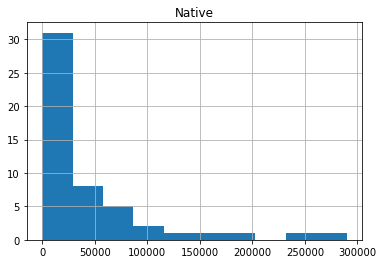

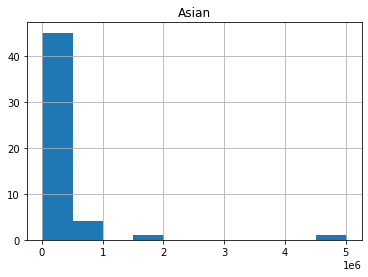

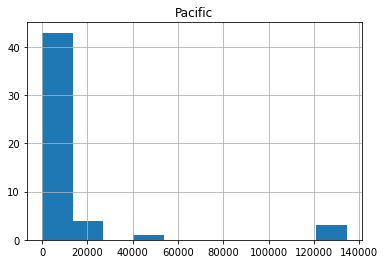

In [28]:
races.hist(column='Hispanic' ,grid = False)
races.hist(column='White',grid = False)
races.hist(column='Black',grid = False)
races.hist(column='Native')
races.hist(column='Asian')
races.hist(column='Pacific')

#  Assignment Part 2 
#  _________________

In [29]:
import numpy as np
import pandas as pd 

##  1. Reading and Converting to DataFrame

In [30]:
inventory = pd.DataFrame(pd.read_csv('inventory.csv'))

## 2. Data

In [31]:
inventory.head(11)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### 3.  Saving Data  to  'Staten island'  
#### sliced data from inventory where location is staten island

In [32]:
staten_island = inventory[(inventory['location']=='Staten Island')]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


##  4.Product Request
##### products availavle at Staten Island

In [33]:
#4
product_request = staten_island.loc[:,'product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

## 5. Seeds available at Broolyn

In [34]:
inventory[(inventory['location']=='Brooklyn')&(inventory['product_type'] == 'seeds')]

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


## 6. Adding Stock in Inventory

In [35]:
inventory['in_stock'] =inventory['quantity']>0
inventory.head(10)

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


## 7. Total Value 

In [36]:
inventory['total_value'] =inventory['quantity']*inventory['price']
inventory.head(3)

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15


## 8. Saving lambda  

In [37]:
combine_lambda = lambda row:'{} - {}'.format(row.product_type,
                     row.product_description)

## 9. Adding Description 

In [38]:
inventory['full_description'] = inventory.apply(combine_lambda,axis=1)

In [39]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
